In [167]:
# python 3.8

In [228]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
plt.rcParams['figure.figsize'] = [15, 10]
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier

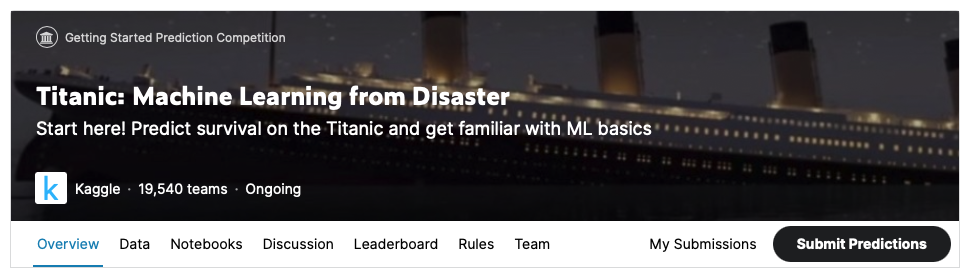

In [229]:
Image(filename='./data/titanic/Screenshot 2020-12-04 at 17.32.41.png')

Ref: https://www.kaggle.com/c/titanic

Ref: https://www.kaggle.com/dmilla/introduction-to-decision-trees-titanic-dataset

In [230]:
data = pd.read_csv('data/titanic/train.csv')
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [232]:
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [233]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [234]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Parch,0,0.0
SibSp,0,0.0


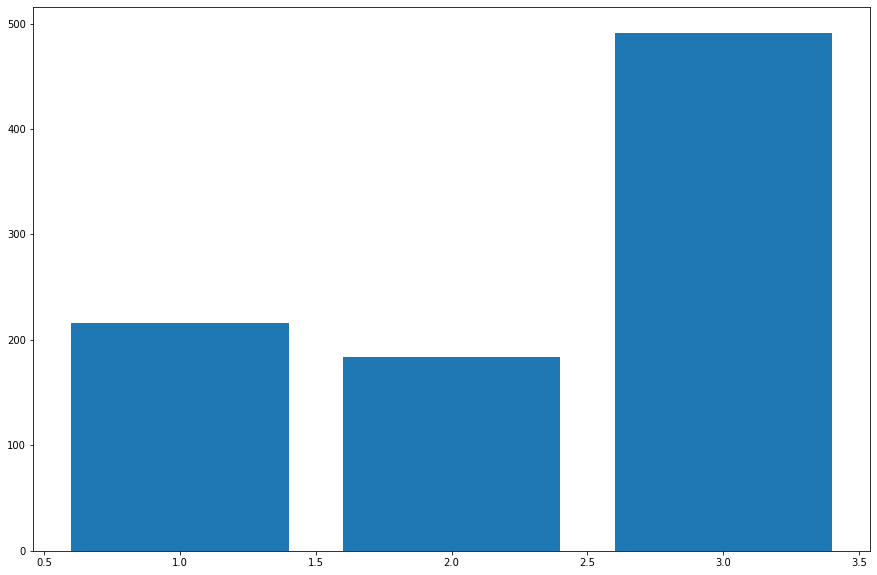

In [235]:
plt.bar(data.Pclass.value_counts().reset_index()['index'], data.Pclass.value_counts().reset_index()['Pclass']);

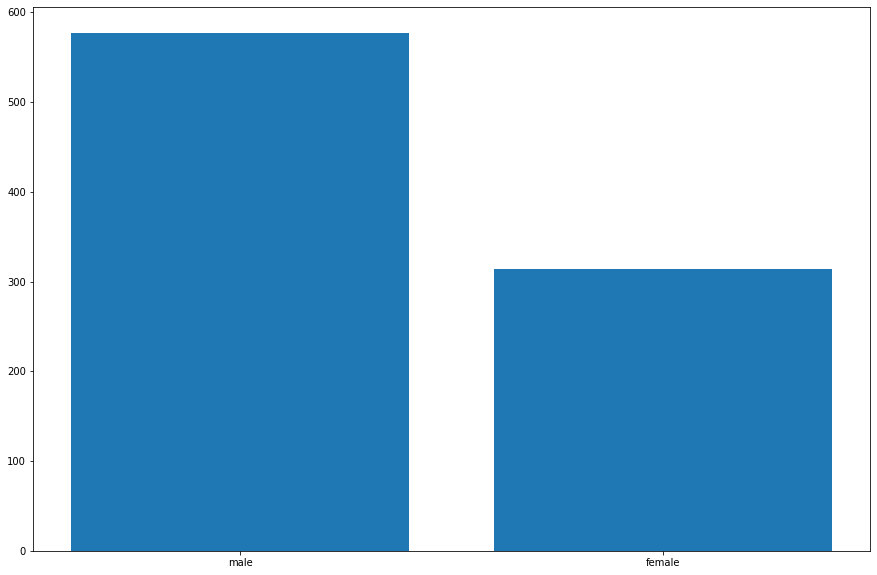

In [236]:
plt.bar(data.Sex.value_counts().reset_index()['index'], data.Sex.value_counts().reset_index()['Sex']);

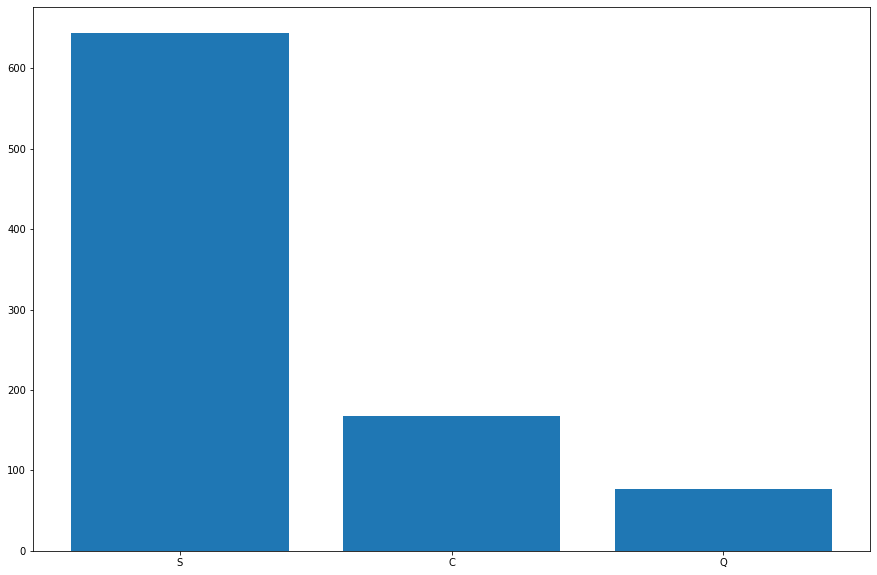

In [237]:
plt.bar(data.Embarked.value_counts().reset_index()['index'], data.Embarked.value_counts().reset_index()['Embarked']);

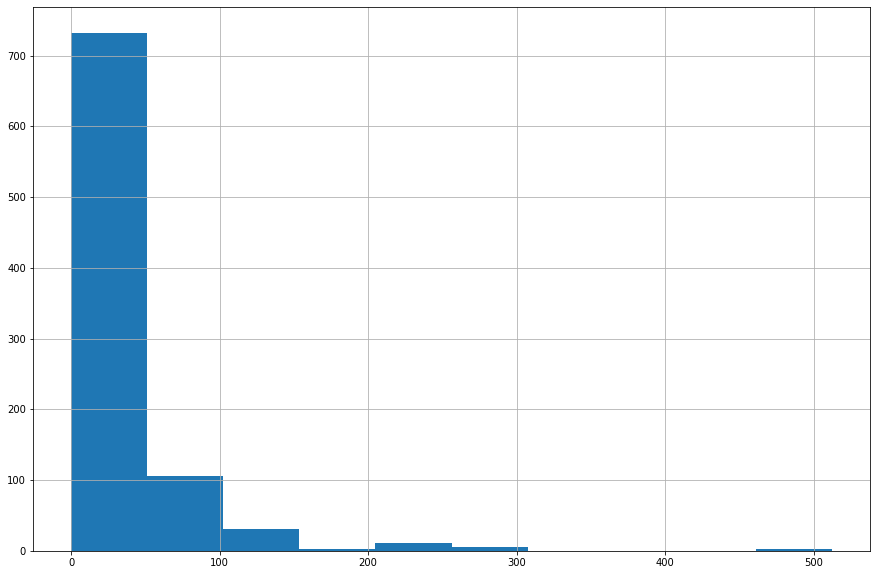

In [238]:
data.Fare.hist();

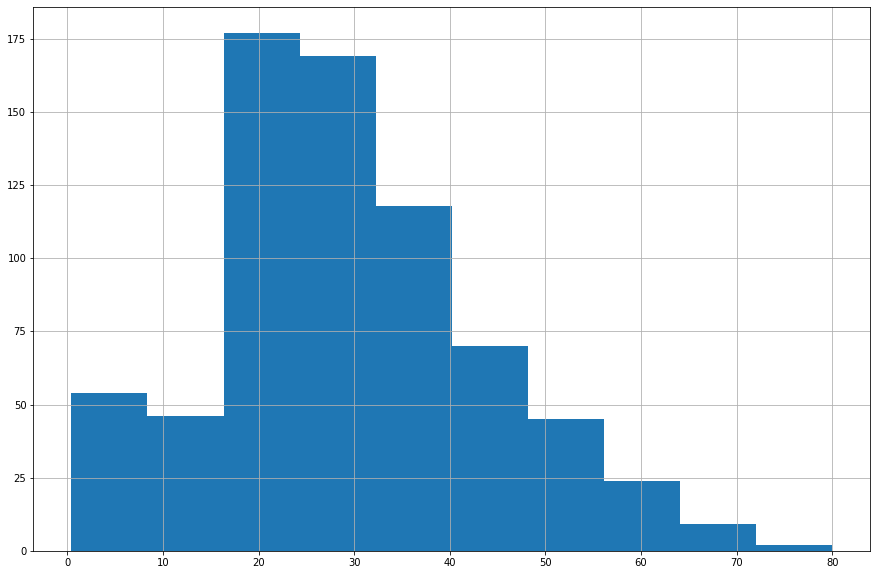

In [239]:
data.Age.hist();

In [240]:
#sns.pairplot(train, hue="Survived", height = 2, palette = 'colorblind');

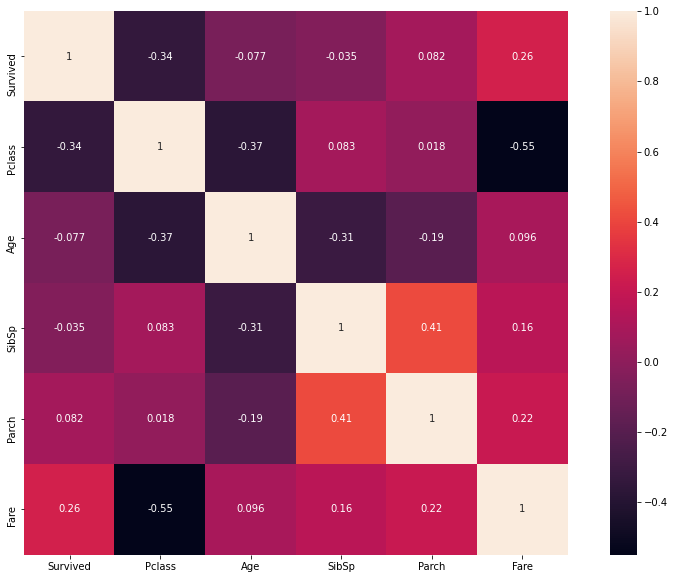

In [241]:
corrmat = data.corr()
sns.heatmap(corrmat, annot = True, square = True);

## Build Classifiers



In [242]:
data = pd.get_dummies(data, dummy_na=True, drop_first=True)
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data.dropna(inplace=True)
train, test = train_test_split(data, test_size = 0.3, stratify = data['Survived'], random_state = 42)

X_train = train.drop('Survived', axis=1)
y_train = train.Survived
X_test = test.drop('Survived', axis=1)
y_test = test.Survived

Text(0.5, 0, 'Max Depth')

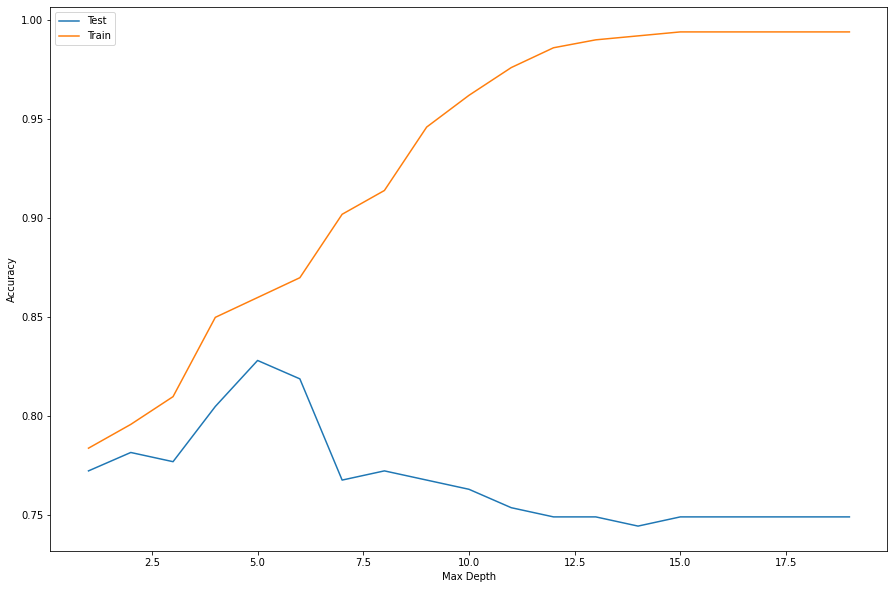

In [243]:
acc_train = []
acc_test = []
for i in np.arange(1,20):
    mod_dt = DecisionTreeClassifier(max_depth = i, random_state = 1)
    mod_dt.fit(X_train, y_train)
    prediction_test = mod_dt.predict(X_test)
    prediction_train = mod_dt.predict(X_train)
    acc_test.append(metrics.accuracy_score(prediction_test,y_test))
    acc_train.append(metrics.accuracy_score(prediction_train,y_train))

    #print(f'Depth {i}, The accuracy is {metrics.accuracy_score(prediction,y_test)}')
plt.plot(np.arange(1,len(acc_test)+1),acc_test, label='Test')
plt.plot(np.arange(1,len(acc_train)+1),acc_train, label='Train')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')

In [244]:
mod_dt = DecisionTreeClassifier(max_depth = 5, random_state = 1)
mod_dt.fit(X_train, y_train)
X_test
prediction=mod_dt.predict(X_test)
mod_dt.feature_importances_
print(f'Depth {5}, The accuracy is {metrics.accuracy_score(prediction,y_test)}')
pd.DataFrame({'importance': X_test.columns, 'feature [%]': mod_dt.feature_importances_*100})

Depth 5, The accuracy is 0.827906976744186


,importance,feature [%]
0,Pclass,20.257356
1,Age,15.701568
2,SibSp,0.000000
3,Parch,0.000000
4,Fare,7.796876
5,Sex_male,49.404720
6,Sex_nan,0.000000
7,Embarked_Q,0.000000
8,Embarked_S,0.462785
9,Embarked_nan,0.000000


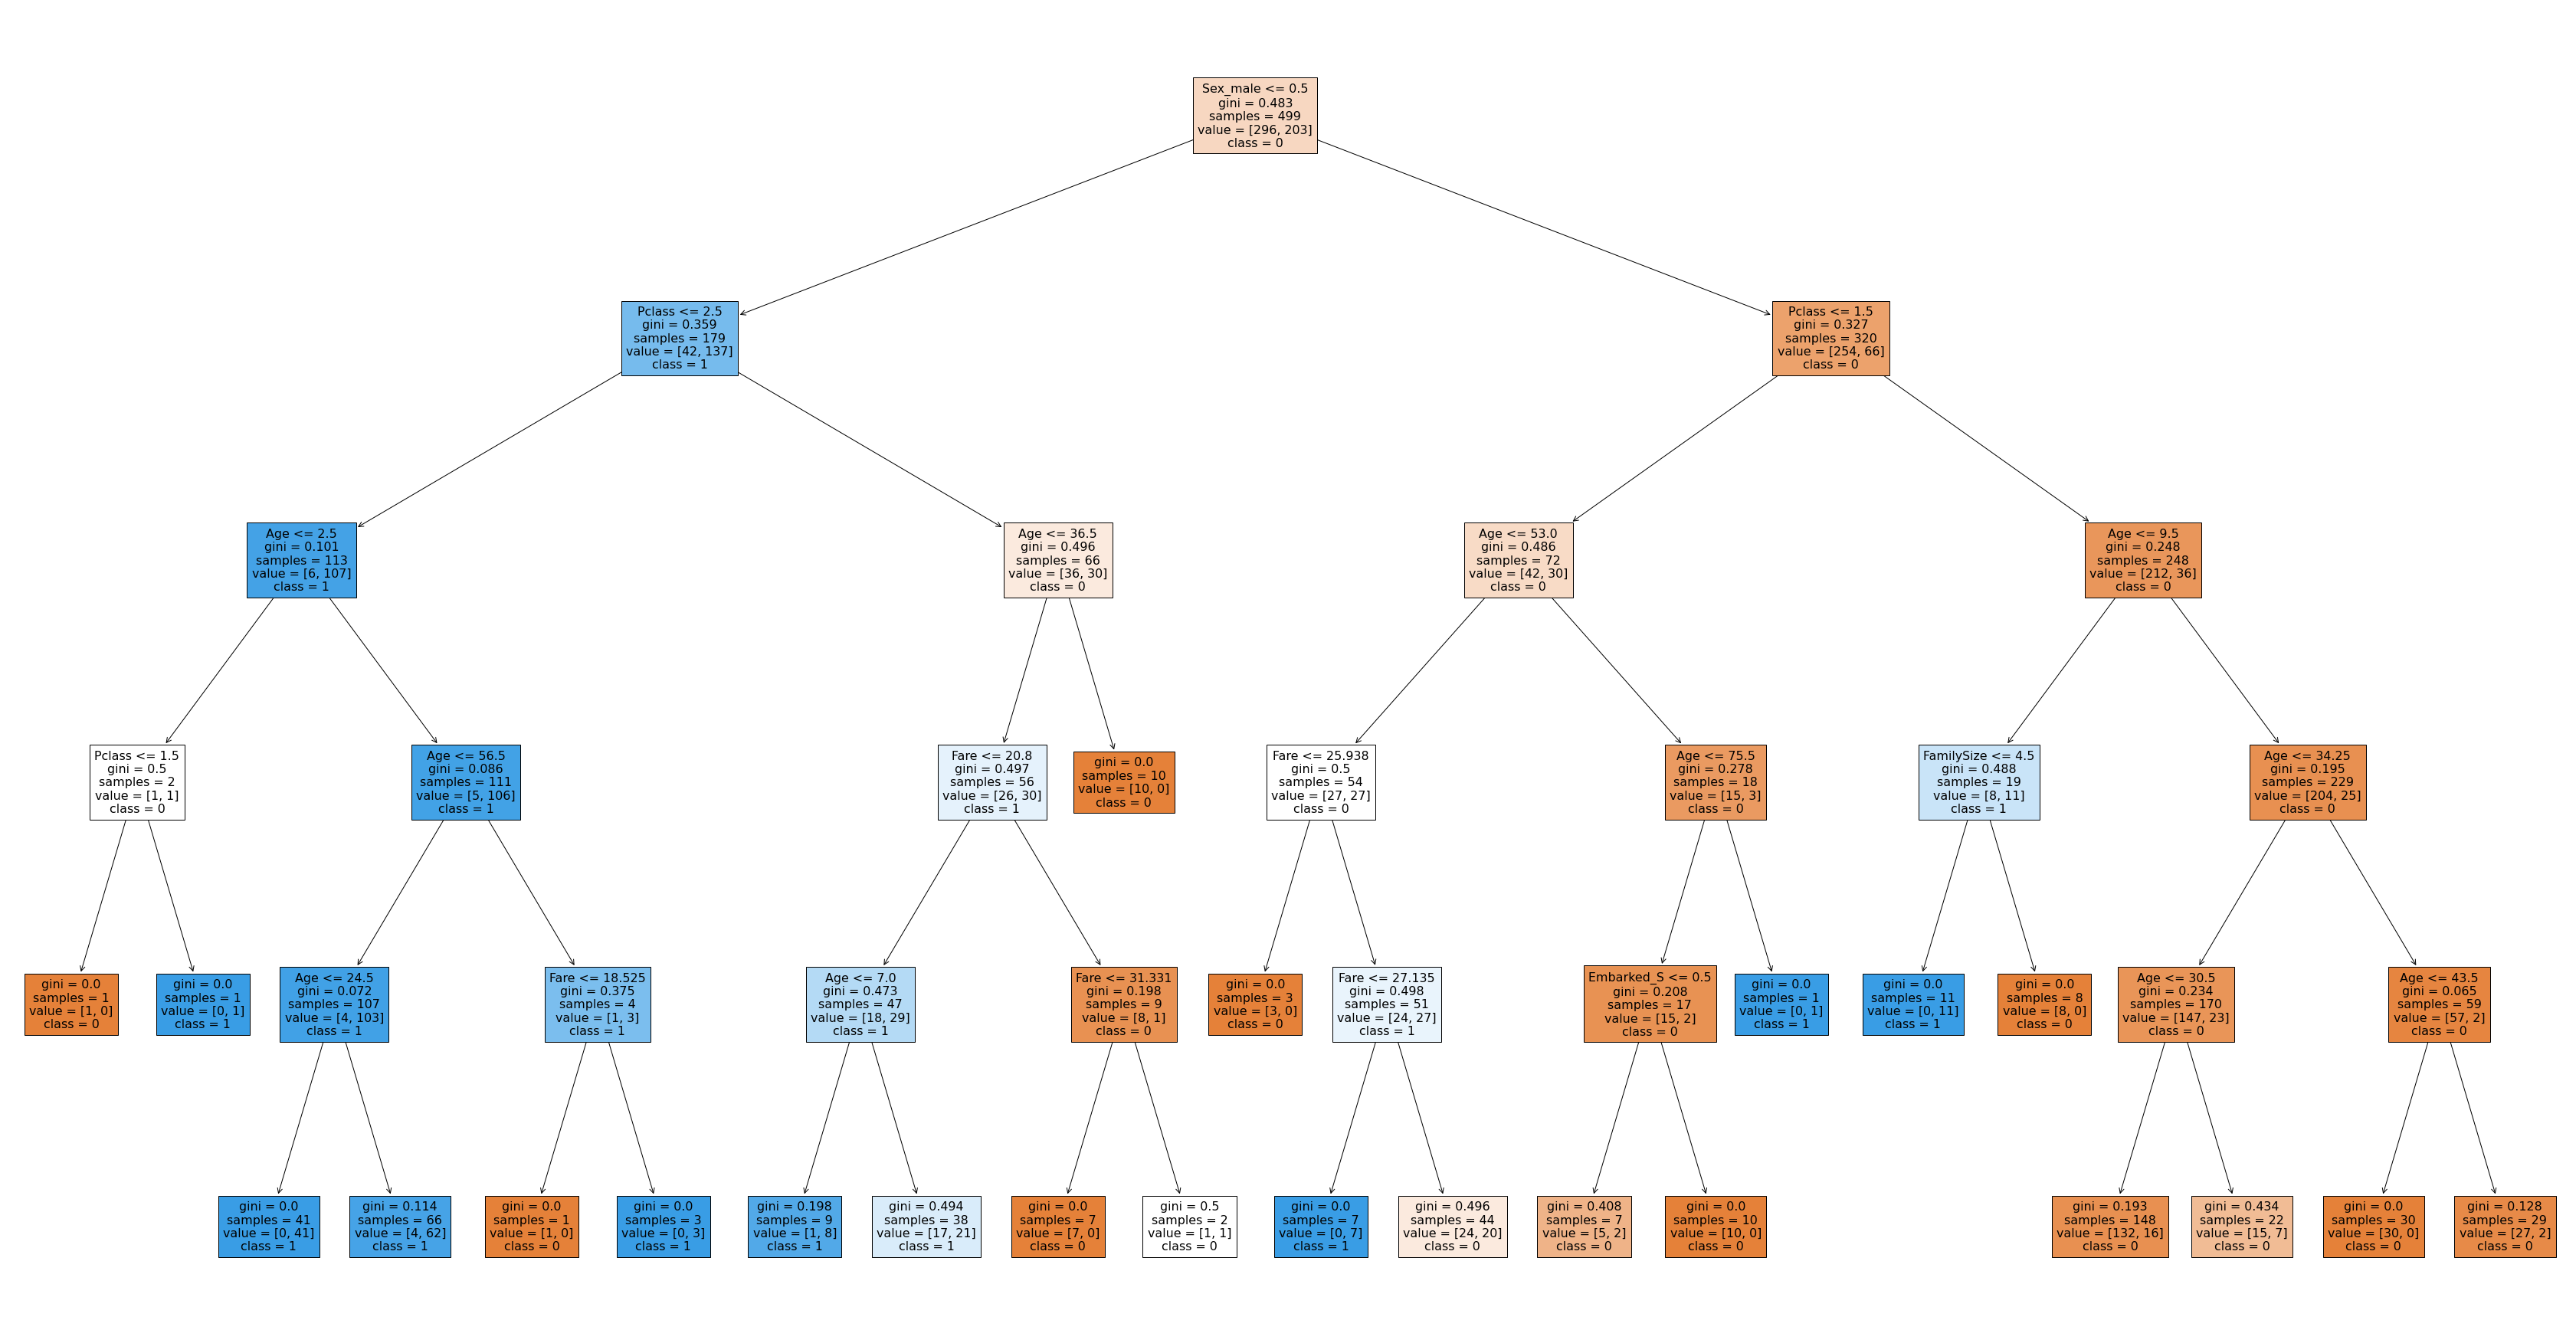

In [245]:
fn = X_train.columns
cn = ['0', '1']
plt.figure(figsize = (60,32))
plot_tree(mod_dt, class_names = cn, feature_names=fn, filled = True);

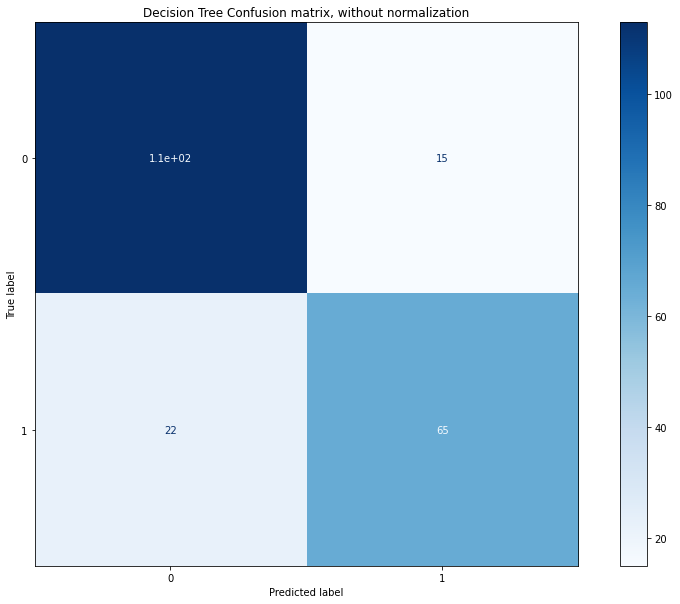

In [246]:
disp = metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');

In [247]:
from sklearn.metrics import classification_report
y_pred = mod_dt.predict(X_test)
print(classification_report(y_test, y_pred, target_names=cn))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       128
           1       0.81      0.75      0.78        87

    accuracy                           0.83       215
   macro avg       0.82      0.81      0.82       215
weighted avg       0.83      0.83      0.83       215



In [215]:
data.Sex.unique()

array(['male', 'female'], dtype=object)